In [ ]:
!pip install ipywidgets --quiet

In [ ]:
!pip install graphviz --quiet

# Dataframes y esas cosas

In [ ]:
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

In [ ]:
import pandas as pd

df_train = pd.read_csv("https://raw.githubusercontent.com/anamartiiins/MDS6-IDEALISTA/main/output_data/df_train_util.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/anamartiiins/MDS6-IDEALISTA/main/output_data/df_test_util.csv")

drop_columns = ['geometry',
                'barrio_id',
                'barrio',
                'precio_unitario_m2',
                'precio_logaritmico',
                'precio_mean_barrio',
                'precio_unitario_m2_mean_barrio',
                'cusec']

df_train = df_train.drop(drop_columns, axis=1)
df_test = df_test.drop(drop_columns, axis=1)

Datos para este y otros dataset del zip:

https://datos.madrid.es/FWProjects/egob/Catalogo/UrbanismoInfraestructura/Ficheros/Callejero%20oficial%20-%20descripci%C3%B3n%20de%20ficheros.pdf

In [ ]:
import zipfile
import io
import requests

url_zip = 'https://github.com/anamartiiins/MDS6-IDEALISTA/raw/main/input_data/Callejero%20de%20Madrid-20240213T181500Z-001.zip'

# Descargar el archivo ZIP
response = requests.get(url_zip)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Listar los archivos en el ZIP
archivos_zip = zip_file.namelist()

# Encontrar el archivo DireccionesVigentes_20240212.csv dentro de la carpeta
carpeta = 'Callejero de Madrid'
archivo_direcciones = f"{carpeta}/DireccionesVigentes_20240212.csv"

# Leer el archivo CSV directamente desde el ZIP
with zip_file.open(archivo_direcciones) as file:
    df_direcciones = pd.read_csv(file, sep=';', encoding='ISO-8859-1')

################################################################################

# TRANSFORMACIONES

df_direcciones = df_direcciones.drop([
    'COD_VIA',
    'VIA_PAR',
    'VIA_NOMBRE_ACENTOS',
    'CLASE_APP',
    'CALIFICADOR',
    'COD_NDP',
    'UTMX_ED',
    'UTMY_ED',
    'UTMX_ETRS',
    'UTMY_ETRS',
    'TIPO_NDP',
    'ANGULO_ROTULACION',
    'COD_POSTAL'], axis=1)

# Crear un diccionario de mapeo de abreviaturas a nombres completos de distritos
distrito_mapping = {
    1: 'Centro',
    2: 'Arganzuela',
    3: 'Retiro',
    4: 'Salamanca',
    5: 'Chamartín',
    6: 'Tetuán',
    7: 'Chamberí',
    8: 'Fuencarral-El Pardo',
    9: 'Moncloa-Aravaca',
    10: 'Latina',
    11: 'Carabanchel',
    12: 'Usera',
    13: 'Puente de Vallecas',
    14: 'Moratalaz',
    15: 'Ciudad Lineal',
    16: 'Hortaleza',
    17: 'Villaverde',
    18: 'Villa de Vallecas',
    19: 'Vicálvaro',
    20: 'San Blas-Canillejas',
    21: 'Barajas'
}

# Convertir las claves del diccionario al mismo tipo de dato que la columna 'DISTRITO'
df_direcciones['DISTRITO'] = df_direcciones['DISTRITO'].astype(int).map(distrito_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Centro'
barrio_centro_mapping = {
    1.0: 'Palacio',
    2.0: 'Embajadores',
    3.0: 'Cortes',
    4.0: 'Justicia',
    5.0: 'Universidad',
    6.0: 'Sol'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Centro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Centro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Centro', 'BARRIO'].replace(barrio_centro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Arganzuela'
barrio_arganzuela_mapping = {
    1.0: 'Imperial',
    2.0: 'Acacias',
    3.0: 'Chopera',
    4.0: 'Legazpi',
    5.0: 'Delicias',
    6.0: 'Palos de la frontera',
    7.0: 'Atocha'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Centro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Arganzuela', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Arganzuela', 'BARRIO'].replace(barrio_arganzuela_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Retiro'
barrio_retiro_mapping = {
    1.0: 'Pacífico',
    2.0: 'Adelfas',
    3.0: 'Estrella',
    4.0: 'Ibiza',
    5.0: 'Los Jerónimos',
    6.0: 'Niño Jesús'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Retiro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Retiro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Retiro', 'BARRIO'].replace(barrio_retiro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Salamanca'
barrio_salamanca_mapping = {
    1.0: 'Recoletos',
    2.0: 'Goya',
    3.0: 'Fuente del Berro',
    4.0: 'Guindalera',
    5.0: 'Lista',
    6.0: 'Castellana'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Salamanca'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Salamanca', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Salamanca', 'BARRIO'].replace(barrio_salamanca_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Chamartín'
barrio_chamartin_mapping = {
    1.0: 'El Viso',
    2.0: 'Prosperidad',
    3.0: 'Ciudad Jardin',
    4.0: 'Hispanoamérica',
    5.0: 'Nueva España',
    6.0: 'Castilla'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Chamartín'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamartín', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamartín', 'BARRIO'].replace(barrio_chamartin_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Tetuán'
barrio_tetuan_mapping = {
    1.0: 'Bellas Vistas',
    2.0: 'Cuatro Caminos',
    3.0: 'Castillejos',
    4.0: 'Almenara',
    5.0: 'Valdeacederas',
    6.0: 'Berruguete'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Tetuán'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Tetuán', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Tetuán', 'BARRIO'].replace(barrio_tetuan_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Chamberí'
barrio_chamberi_mapping = {
    1.0: 'Gaztambide',
    2.0: 'Arapiles',
    3.0: 'Trafalgar',
    4.0: 'Almagro',
    5.0: 'Rios Rosas',
    6.0: 'Vallehermoso'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Chamberí'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamberí', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Chamberí', 'BARRIO'].replace(barrio_chamberi_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Fuencarral-El Pardo'
barrio_fuencarral_el_pardo_mapping = {
    1.0: 'El Pardo',
    2.0: 'Fuentelarreina',
    3.0: 'Peñagrande',
    4.0: 'Pilar',
    5.0: 'La Paz',
    6.0: 'Valverde',
    7.0: 'Mirasierra',
    8.0: 'El Goloso'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Fuencarral-El Pardo'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Fuencarral-El Pardo', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Fuencarral-El Pardo', 'BARRIO'].replace(barrio_fuencarral_el_pardo_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Moncloa-Aravaca'
barrio_moncloa_aravaca_mapping = {
    1.0: 'Casa de Campo',
    2.0: 'Argüelles',
    3.0: 'Ciudad Universitaria',
    4.0: 'Valdezarza',
    5.0: 'Valdemarin',
    6.0: 'El Plantio',
    7.0: 'Aravaca'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Moncloa-Aravaca'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moncloa-Aravaca', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moncloa-Aravaca', 'BARRIO'].replace(barrio_moncloa_aravaca_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Latina'
barrio_latina_mapping = {
    1.0: 'Los Cármenes',
    2.0: 'Puerta del Ángel',
    3.0: 'Lucero',
    4.0: 'Aluche',
    5.0: 'Campamento',
    6.0: 'Cuatro Vientos',
    7.0: 'Águilas'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Latina'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Latina', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Latina', 'BARRIO'].replace(barrio_latina_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Carabanchel'
barrio_carabanchel_mapping = {
    1.0: 'Comillas',
    2.0: 'Opañel',
    3.0: 'San Isidro',
    4.0: 'Vista Alegre',
    5.0: 'Puerta Bonita',
    6.0: 'Buenavista',
    7.0: 'Abrantes'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Carabanchel'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Carabanchel', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Carabanchel', 'BARRIO'].replace(barrio_carabanchel_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Usera'
barrio_usera_mapping = {
    1.0: 'Orcasitas',
    2.0: 'Orcasur',
    3.0: 'San Fermín',
    4.0: 'Almendrales',
    5.0: 'Moscardó',
    6.0: 'Zofio',
    7.0: 'Pradolongo'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Usera'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Usera', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Usera', 'BARRIO'].replace(barrio_usera_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Puente de Vallecas'
barrio_vallecas_mapping = {
    1.0: 'Entrevias',
    2.0: 'San Diego',
    3.0: 'Palomeras Bajas',
    4.0: 'Palomeras Sureste',
    5.0: 'Portazgo',
    6.0: 'Numancia'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Puente de Vallecas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Puente de Vallecas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Puente de Vallecas', 'BARRIO'].replace(barrio_vallecas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Moratalaz'
barrio_moratalaz_mapping = {
    1.0: 'Pavones',
    2.0: 'Horcajo',
    3.0: 'Marroquina',
    4.0: 'Media Legua',
    5.0: 'Fontarrón',
    6.0: 'Vinateros'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Moratalaz'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moratalaz', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Moratalaz', 'BARRIO'].replace(barrio_moratalaz_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Ciudad Lineal'
barrio_ciudad_lineal_mapping = {
    1.0: 'Ventas',
    2.0: 'Pueblo Nuevo',
    3.0: 'Quintana',
    4.0: 'La Concepción',
    5.0: 'San Pascual',
    6.0: 'San Juan Bautista',
    7.0: 'Colina',
    8.0: 'Atalaya',
    9.0: 'Costillares'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Ciudad Lineal'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Ciudad Lineal', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Ciudad Lineal', 'BARRIO'].replace(barrio_ciudad_lineal_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Hortaleza'
barrio_hortaleza_mapping = {
    1.0: 'Palomas',
    2.0: 'Piovera',
    3.0: 'Canillas',
    4.0: 'Pinar del Rey',
    5.0: 'Apóstol Santiago',
    6.0: 'Valdefuentes'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Hortaleza'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Hortaleza', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Hortaleza', 'BARRIO'].replace(barrio_hortaleza_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Villaverde'
barrio_villaverde_mapping = {
    1.0: 'Villaverde Alto - Casco Histórico de Villaverde',
    2.0: 'San Cristóbal',
    3.0: 'Butarque',
    4.0: 'Los Rosales',
    5.0: 'Ángeles'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Villaverde'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villaverde', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villaverde', 'BARRIO'].replace(barrio_villaverde_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Villa de Vallecas'
barrio_vallecas_mapping = {
    1.0: 'Casco Histórico de Vallecas',
    2.0: 'Santa Eugenia',
    3.0: 'Ensanche de Vallecas'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Villa de Vallecas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villa de Vallecas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Villa de Vallecas', 'BARRIO'].replace(barrio_vallecas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Vicálvaro'
barrio_vicalvaro_mapping = {
    1.0: 'Casco Histórico de Vicálvaro',
    2.0: 'Valdebernardo',
    3.0: 'Valderrivas',
    4.0: 'El Cañaveral'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Vicálvaro'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Vicálvaro', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Vicálvaro', 'BARRIO'].replace(barrio_vicalvaro_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'San Blas-Canillejas'
barrio_sanblas_mapping = {
    1.0: 'Simancas',
    2.0: 'Hellín',
    3.0: 'Amposta',
    4.0: 'Arcos',
    5.0: 'Rosas',
    6.0: 'Rejas',
    7.0: 'Canillejas',
    8.0: 'El Salvador'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'San Blas-Canillejas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'San Blas-Canillejas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'San Blas-Canillejas', 'BARRIO'].replace(barrio_sanblas_mapping)

# Crear un diccionario de mapeo de códigos de barrios a nombres de barrios para el distrito 'Barajas'
barrio_barajas_mapping = {
    1.0: 'Alameda de Osuna',
    2.0: 'Aeropuerto',
    3.0: 'Casco Histórico de Barajas',
    4.0: 'Timón',
    5.0: 'Corralejos'
}

# Aplicar el mapeo a la columna 'BARRIO' donde el 'DISTRITO' es 'Barajas'
df_direcciones.loc[df_direcciones['DISTRITO'] == 'Barajas', 'BARRIO'] = df_direcciones.loc[df_direcciones['DISTRITO'] == 'Barajas', 'BARRIO'].replace(barrio_barajas_mapping)

In [ ]:
def dms_to_decimal(dms_str):
    # Divide la cadena de DMS en partes
    parts = dms_str.replace('°', ' ').replace('\'', ' ').replace('\"', '').split()

    # Extrae grados, minutos y segundos
    degrees = float(parts[0])
    minutes = float(parts[1])
    seconds = float(parts[2]) if len(parts) > 2 else 0  # Si no hay segundos, establece en 0

    # Determina si la coordenada es norte o sur, este u oeste
    direction = 1 if parts[-1] in ['N', 'E'] else -1

    # Calcula la coordenada en formato decimal
    decimal_coordinate = direction * (degrees + minutes/60 + seconds/3600)

    return decimal_coordinate

In [ ]:
# Aplica la función a todas las filas del DataFrame
df_direcciones['LATITUD_DECIMAL'] = df_direcciones['LATITUD'].apply(dms_to_decimal)
df_direcciones['LONGITUD_DECIMAL'] = df_direcciones['LONGITUD'].apply(dms_to_decimal)

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

def distancia_euclidiana(df1, df2, df1_latitud='latitud', df1_longitud='longitud', df2_latitud='latitud', df2_longitud='longitud'):
    # Tamaño del lote (chunk)
    chunk_size = 3000

    # Calcular la cantidad total de filas
    total_filas = len(df1)

    df_resultado = pd.DataFrame()  # DataFrame para almacenar los resultados

    with tqdm(total=total_filas, desc='Processing Rows', position=0, leave=True) as pbar_total:
        for chunk_start in range(0, len(df1), chunk_size):
            chunk_end = min(chunk_start + chunk_size, len(df1))
            chunk_df1 = df1.iloc[chunk_start:chunk_end].copy()

            # Inicializar listas para almacenar resultados
            distancias_minimas = []
            indices_filas_df2 = []

            for _, row_df1 in chunk_df1.iterrows():
                latitud_given, longitud_given = row_df1[df1_latitud], row_df1[df1_longitud]

                # Calcular distancias euclidianas utilizando operaciones vectorizadas de NumPy
                latitudes_df2, longitudes_df2 = df2[df2_latitud].values, df2[df2_longitud].values

                distancias = np.sqrt(
                    (latitudes_df2 - latitud_given) ** 2 +
                    (longitudes_df2 - longitud_given) ** 2
                )

                # Encontrar la distancia mínima y el índice correspondiente
                distancia_minima, index_minimo = np.min(distancias), np.argmin(distancias)

                distancias_minimas.append(distancia_minima)
                indices_filas_df2.append(index_minimo)

                pbar_total.update(1)

            # Agregar las nuevas columnas a chunk_df1
            chunk_df1['distancia_euclidiana'] = distancias_minimas
            chunk_df1['row_df2'] = indices_filas_df2

            # Liberar memoria después de cada chunk
            del distancias_minimas, indices_filas_df2
            gc.collect()

            # Unir df1 con df2 basado en 'row_df2'
            df_resultado = pd.concat([df_resultado, pd.merge(chunk_df1, df2,
                                                             left_on='row_df2', right_index=True,
                                                             suffixes=('', '_DF2'))])

    # Restablecer el índice del DataFrame resultado
    df_resultado = df_resultado.reset_index(drop=True)

    return df_resultado

In [ ]:
df_train = distancia_euclidiana(df_train, df_direcciones, 'latitud', 'longitud', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL')

Processing Rows: 100%|██████████| 54937/54937 [01:24<00:00, 652.27it/s]


In [ ]:
df_test = distancia_euclidiana(df_test, df_direcciones, 'latitud', 'longitud', 'LATITUD_DECIMAL', 'LONGITUD_DECIMAL')

Processing Rows: 100%|██████████| 18380/18380 [00:25<00:00, 724.09it/s]


In [ ]:
# Configurar Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
degrees_per_km_madrid = 0.011798952599750912
df_train['distancia_euclidiana'] = df_train['distancia_euclidiana'] / degrees_per_km_madrid * 1000
df_test['distancia_euclidiana'] = df_test['distancia_euclidiana'] / degrees_per_km_madrid * 1000

Dropeo las filas que a la hora de unir los dfs superen en 50 metros la distancia de una ubicación y la otra

In [ ]:
# Crear una máscara booleana para identificar las filas que cumplen la condición
condicion_train = df_train['distancia_euclidiana'] > 50
condicion_test = df_test['distancia_euclidiana'] > 50

# Eliminar las filas que cumplen la condición
df_train = df_train.drop(df_train[condicion_train].index)
df_test = df_test.drop(df_test[condicion_test].index)

# Restablecer el índice si es necesario
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
Columnas_que_se_van_a_la_calle = ['LONGITUD_DECIMAL', 'LATITUD_DECIMAL', 'LONGITUD', 'LATITUD', 'row_df2', 'distancia_euclidiana']

# Dropear las columnas
df_train = df_train.drop(columns=Columnas_que_se_van_a_la_calle, errors='ignore')
df_test = df_test.drop(columns=Columnas_que_se_van_a_la_calle, errors='ignore')

In [ ]:
# Eliminar las filas que contienen 'AUTOVÍA' en VIA_CLASE
df_train = df_train[df_train['VIA_CLASE'] != 'AUTOVÍA'].reset_index(drop=True)
df_test = df_test[df_test['VIA_CLASE'] != 'AUTOVÍA'].reset_index(drop=True)

In [ ]:
df_train_secured = df_train.copy()
df_test_secured = df_test.copy()

Voy a dropear la columna 'VIA_NOMBRE' que tiene más de 5.000 variables y no me voy a poner a hacerle onehot

In [ ]:
df_train = df_train.drop('VIA_NOMBRE', axis= 1, errors='ignore')
df_test = df_test.drop('VIA_NOMBRE', axis= 1, errors='ignore')

# Train

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Lista de columnas a aplicar one-hot encoding
columnas_one_hot = ['VIA_CLASE', 'DISTRITO', 'BARRIO']

# Aplicar one-hot encoding a df_train
df_train_encoded = pd.get_dummies(df_train, columns=columnas_one_hot)

# Aplicar one-hot encoding a df_test
df_test_encoded = pd.get_dummies(df_test, columns=columnas_one_hot)

# Selecciona las features (X) y la variable objetivo (y)
X = df_train_encoded.drop(['precio'], axis=1)
y = df_train_encoded['precio']

# Divide el conjunto de datos en entrenamiento y prueba
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.1, random_state=0)

# Crea el modelo XGBoost
model_xgb = XGBRegressor()

# Entrena el modelo
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Metrics

**WARNING!**

Se usará (y_true - y_pred) por convención social. Es menos intuitivo para un mono o alguien no relacionado con estadística. Pero bajo esta idea están construidas las librerías que usaremos

Si tengo una casa de valor 10 y predigo 15

10 - 15 = -5

Es decir, el signo del resultado no es que está en (-5) y está infravalorando, si no lo que le falta para llegar a la predicción 15 - 5 = 10, es decir, está sobrevalorando

In [ ]:
import pandas as pd
import numpy as np

def evaluate_regresion_model(model, df_test=df_test, columna='precio'):
    """
    Evalua un modelo de regresión utilizando un conjunto de prueba y calcula métricas de rendimiento.

    Parámetros:
    - model: Modelo de regresión entrenado.
    - df_test: DataFrame de prueba que contiene características donde nos se ha entrenado.
    - columna: Nombre de la columna objetivo en el DataFrame (por defecto, 'precio').

    Salida:
    Retorna un DataFrame:
    1. df_test_evaluacion: DataFrame con las predicciones y métricas para cada muestra en el conjunto de prueba.
    """

    # Obtener características utilizadas durante el entrenamiento del modelo
    features_modelo = model.feature_names_in_

    # Encontrar las columnas comunes entre las características del modelo y el conjunto de prueba
    columnas_comunes = [col for col in features_modelo if col in df_test.columns]

    # Seleccionar y reordenar las columnas del conjunto de prueba según las características del modelo
    df_prueba_modelo = df_test[columnas_comunes].copy()

    # Encontrar las características faltantes en el conjunto de prueba
    caracteristicas_faltantes_en_prueba = list(set(features_modelo) - set(df_prueba_modelo.columns))

    # Crear un DataFrame con las columnas faltantes y rellenarlas con valores 0
    df_faltantes = pd.DataFrame(0, index=df_prueba_modelo.index, columns=caracteristicas_faltantes_en_prueba)

    # Concatenar el DataFrame faltante con el conjunto de prueba
    df_prueba_modelo = pd.concat([df_prueba_modelo, df_faltantes], axis=1)

    # Organizar las columnas para que sigan el orden original de las características del modelo
    df_prueba_modelo = df_prueba_modelo[features_modelo]

    # Encontrar las columnas en df_test que no están en features
    columnas_en_test_no_en_features = list(set(df_test.columns) - set(features_modelo))

    # Encontrar las features que no están en df_test
    features_no_en_test = list(set(features_modelo) - set(df_test.columns))

    # Imprimir el número de columnas en df_test que no están en features
    print(f"Features de test que no están en el modelo: {len(columnas_en_test_no_en_features)}")

    # Imprimir el número de features que no están en df_test
    print(f"Features del modelo que no están en test: {len(features_no_en_test)}")

    # Convertir los conjuntos de datos en matrices NumPy
    X_test = df_prueba_modelo.values

    # Realizar predicciones
    predicciones = model.predict(X_test)

    # Hacer una copia para evitar modificar el DataFrame original
    df_test_evaluacion = df_test.copy()

    # Agregar las predicciones al DataFrame de prueba
    df_test_evaluacion['predicciones'] = predicciones

    # Calcular métricas de evaluación con y_true primero
    df_test_evaluacion['error'] = df_test_evaluacion[columna] - df_test_evaluacion['predicciones']
    df_test_evaluacion['absolute_error'] = abs(df_test_evaluacion[columna] - df_test_evaluacion['predicciones'])
    df_test_evaluacion['percentage_error'] = ((df_test_evaluacion[columna] - df_test_evaluacion['predicciones']) / df_test_evaluacion[columna]) * 100
    df_test_evaluacion['absolute_percentage_error'] = (abs(df_test_evaluacion[columna] - df_test_evaluacion['predicciones']) / df_test_evaluacion[columna]) * 100

    return df_test_evaluacion

In [ ]:
# Evaluar el modelo
df_xgboost_evaluated = evaluate_regresion_model(model_xgb, df_test_encoded)

Features de test que no están en el modelo: 3
Features del modelo que no están en test: 1


In [ ]:
df_xgboost_evaluated[['precio', 'predicciones', 'absolute_percentage_error', 'absolute_error', 'error', 'percentage_error']].mean()

precio                       392298.923438
predicciones                 385208.718750
absolute_percentage_error        15.501931
absolute_error                56768.838236
error                          7090.180006
percentage_error                 -2.989116
dtype: float64

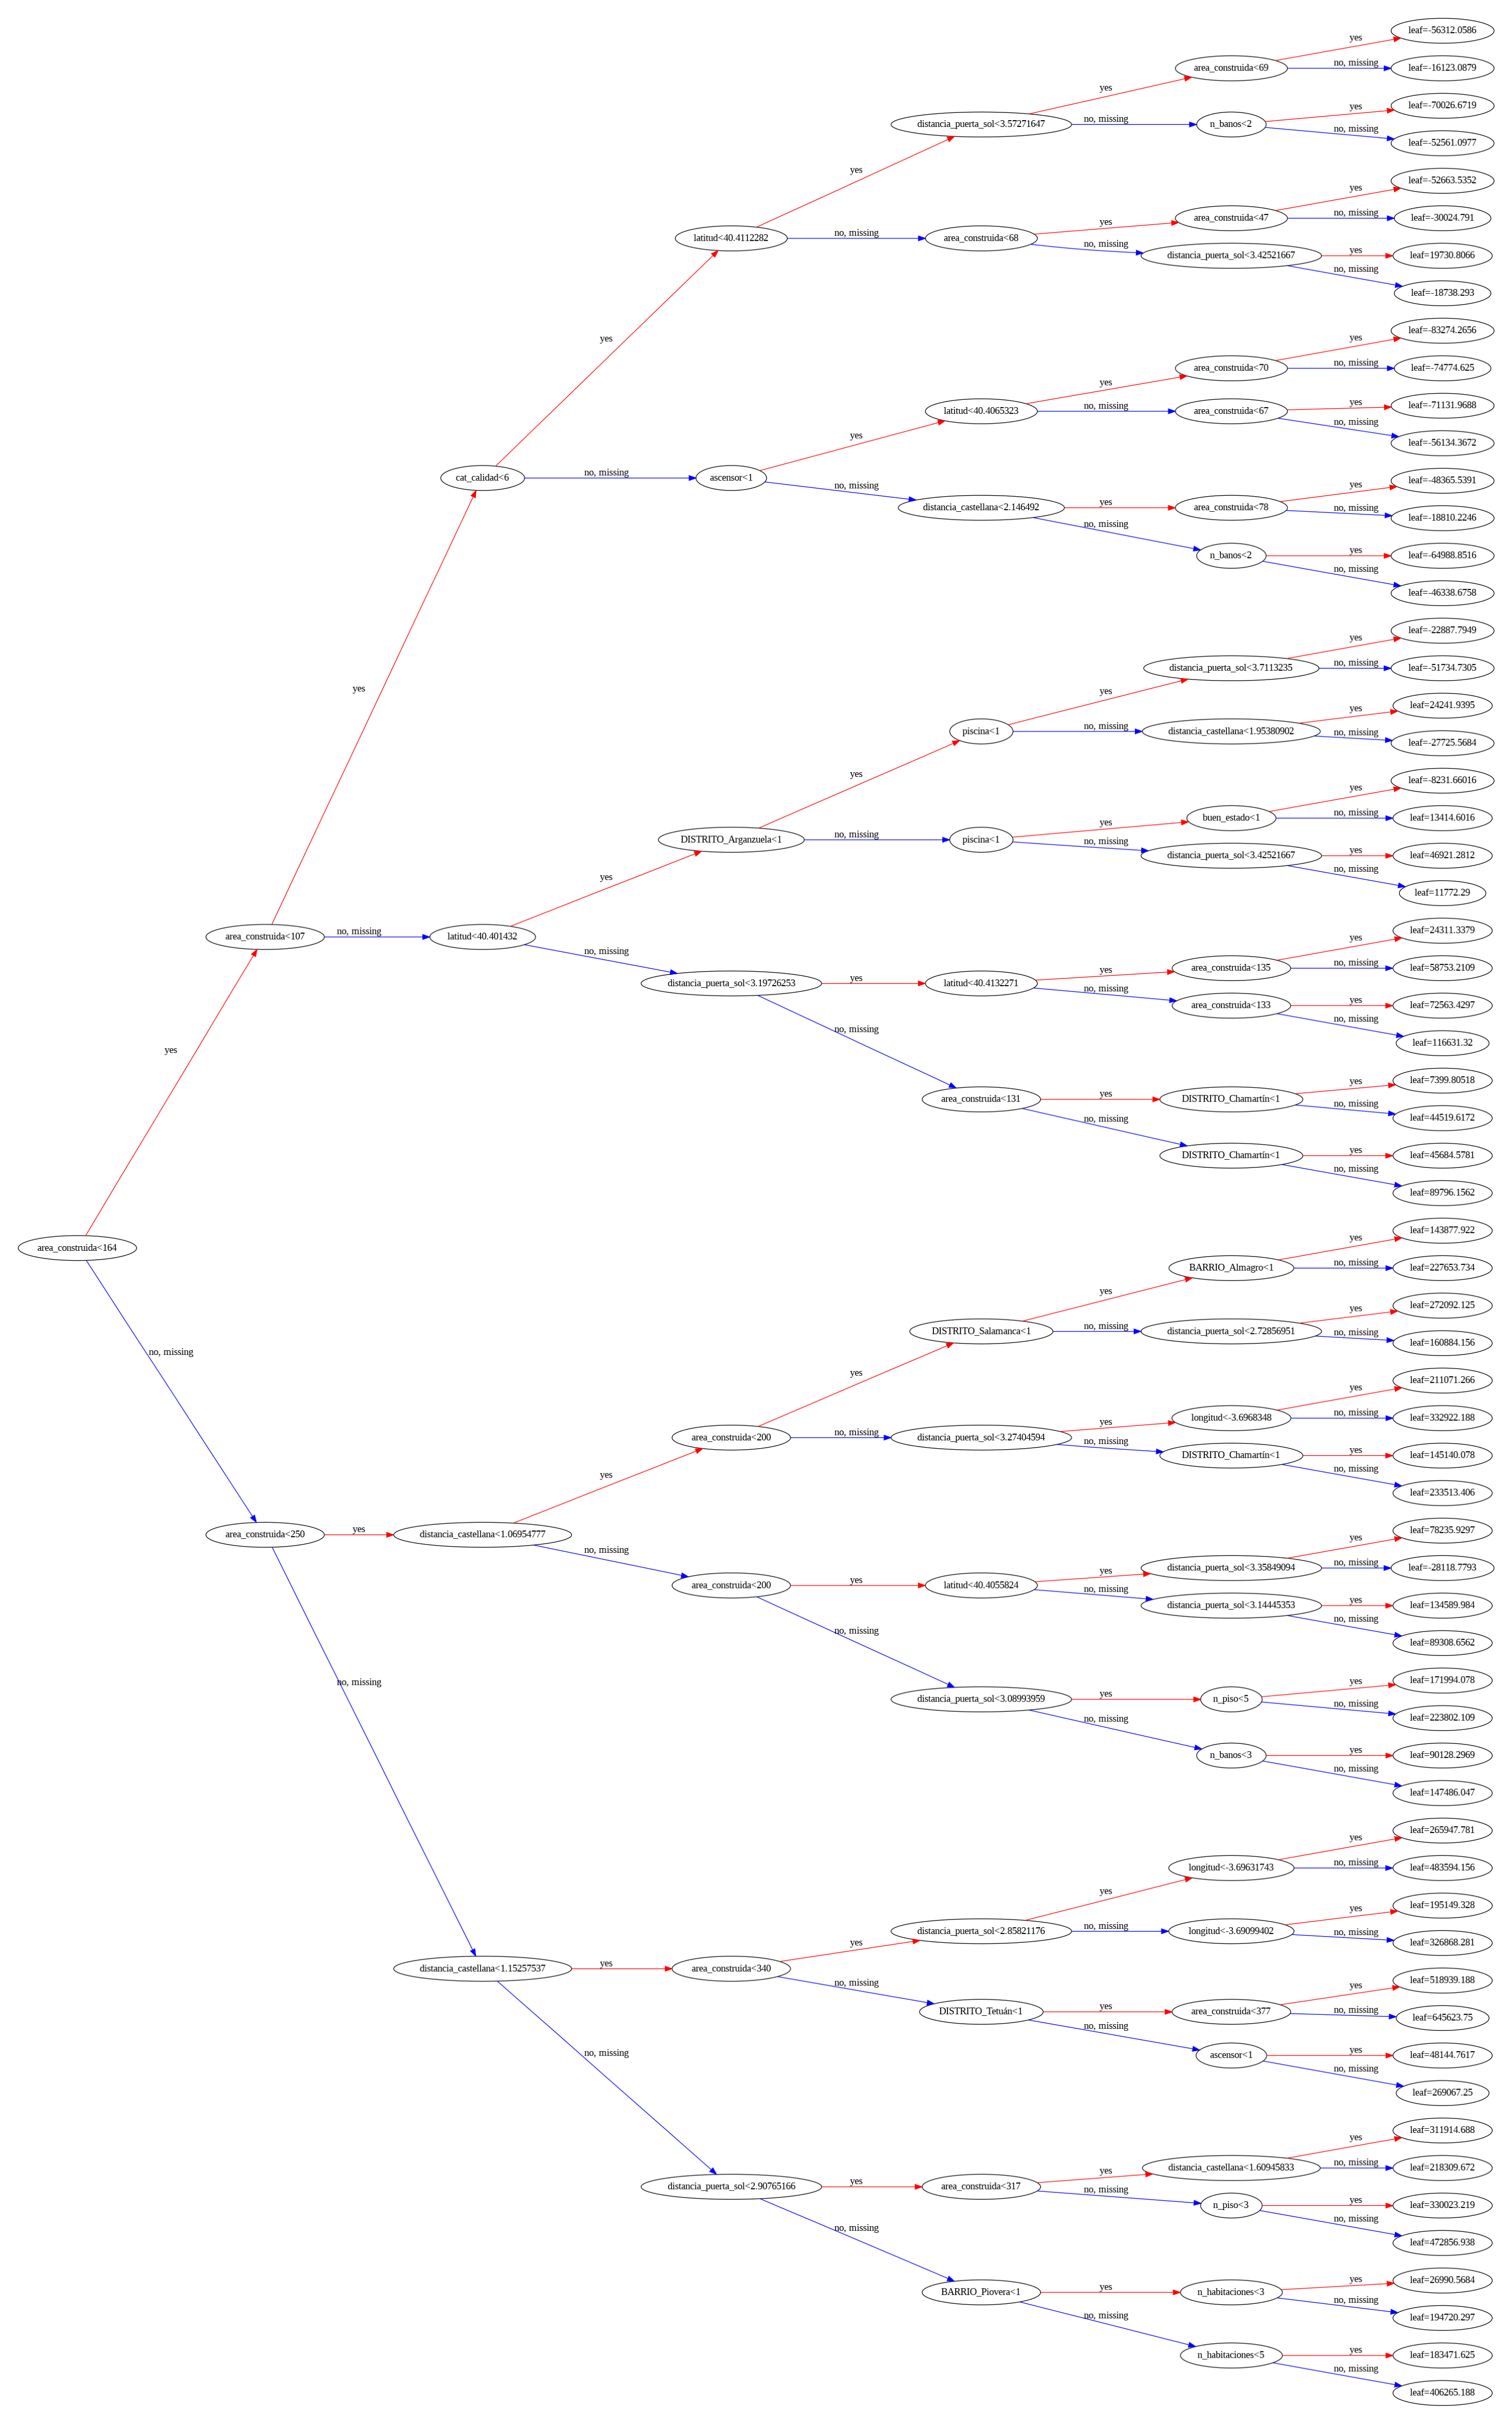

In [ ]:
import xgboost
import matplotlib.pyplot as plt

# Ajusta el tamaño de la figura y la resolución según tus necesidades
plt.figure(figsize=(40, 20), dpi=300)

# Configura el tamaño de la fuente para la visualización del árbol
params = {'font.size': 16}  # Puedes ajustar el tamaño de la fuente según tus necesidades
plt.rcParams.update(params)

# Visualiza el árbol
xgboost.plot_tree(model_xgb, num_trees=0, rankdir='LR', ax=plt.gca())

# Habilita la funcionalidad de zoom y pan
plt.gcf().canvas.mpl_connect('scroll_event', lambda event: event.inaxes.set_xlim(event.inaxes.get_xlim()))
plt.gcf().canvas.mpl_connect('button_press_event', lambda event: plt.gca().relim())

# Muestra la visualización
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from datetime import datetime

def calculate_metrics(df, name, target_column = 'precio', prediction_column = 'predicciones'):
    model_name = name  # Agrega '_macro' al nombre del DataFrame

    # Obtener las columnas objetivo y de predicciones
    target = df[target_column]
    predictions = df[prediction_column]

    # Calcular métricas de evaluación
    rmse = mean_squared_error(target, predictions, squared=False)
    mape = mean_absolute_error(target, predictions) / target.mean() * 100
    r2 = r2_score(target, predictions)
    me = target.mean() - predictions.mean()
    med = median_absolute_error(target, predictions)
    mae = mean_absolute_error(target, predictions)
    maed = median_absolute_error(target, predictions)
    maped = med / target.median() * 100  # Calcular MAPED

    # Calcular otras métricas según tu código
    percentage_error_lower_5 = (abs(df['percentage_error']) < 5).sum() / len(df) * 100
    percentage_error_lower_10 = (abs(df['percentage_error']) < 10).sum() / len(df) * 100
    percentage_error_lower_25 = (abs(df['percentage_error']) < 25).sum() / len(df) * 100
    std_errors = predictions.std()  # Desviación estándar de los errores
    ci_lower = predictions.mean() - 1.95 * predictions.std()  # Límite inferior del intervalo de confianza
    ci_upper = predictions.mean() + 1.95 * predictions.std()  # Límite superior del intervalo de confianza

    # Construir el diccionario de métricas
    metrics = {
        'Model': model_name,
        'RMSE - Root Mean Squared Error': '{:,.0f}'.format(round(float(rmse), 2)),
        'MAPE - Mean Absolute Percentage Error': round(float(mape), 2),
        'R2 - Coefficient of Determination': round(float(r2), 2),
        'ME - Mean Error': '{:,.0f}'.format(round(float(me), 0)),
        'MED - Median Error': '{:,.0f}'.format(round(float(med), 0)),
        'MAE - Mean Absolute Error': '{:,.0f}'.format(round(float(mae), 0)),
        'MAED - Median Absolute Error': '{:,.0f}'.format(round(float(maed), 2)),
        'MAPED - Median Absolute Percentage Error': round(float(maped), 0),
        "Percentage error lower_5": percentage_error_lower_5,
        "Percentage error lower_10": percentage_error_lower_10,
        "Percentage error lower_25": percentage_error_lower_25,
        'Standard Deviation of Errors': round(float(std_errors), 2),
        'Confidence Interval Lower': round(float(ci_lower), 2),
        'Confidence Interval Upper': round(float(ci_upper), 2),
        'Model Folder': f"experiment_{model_name}_{datetime.now().strftime('%Y%m%d-%H%M%S')}",
    }

    return metrics

In [ ]:
calculate_metrics(df_xgboost_evaluated, 'xgboost_macro')

{'Model': 'xgboost_macro',
 'RMSE - Root Mean Squared Error': '136,814',
 'MAPE - Mean Absolute Percentage Error': 14.47,
 'R2 - Coefficient of Determination': 0.89,
 'ME - Mean Error': '7,090',
 'MED - Median Error': '28,543',
 'MAE - Mean Absolute Error': '56,769',
 'MAED - Median Absolute Error': '28,543',
 'MAPED - Median Absolute Percentage Error': 11.0,
 'Percentage error lower_5': 0,
 'Percentage error lower_10': 0,
 'Percentage error lower_25': 0,
 'Standard Deviation of Errors': 374280.12,
 'Confidence Interval Lower': -344637.53,
 'Confidence Interval Upper': 1115054.96,
 'Model Folder': 'experiment_xgboost_macro_20240306-152124'}

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from datetime import datetime

def train_and_evaluate_models(models, df_train, df_test, target_column='precio'):
    """
    Entrena y evalúa modelos de regresión.

    Parámetros:
    - models: Lista de modelos de regresión.
    - df_train: DataFrame de entrenamiento.
    - df_test: DataFrame de prueba.
    - target_column: Nombre de la columna objetivo (por defecto, 'precio').

    Retorna:
    - Lista de diccionarios con las métricas de cada modelo.
    """

    results = []

    for model in models:
        # Entrenar el modelo
        X_train = df_train.drop(target_column, axis=1)
        y_train = df_train[target_column]
        model.fit(X_train, y_train)

        # Evaluar el modelo en el conjunto de prueba
        df_test_evaluacion = evaluate_regresion_model(model, df_test, target_column)

        # Calcular métricas
        metrics = calculate_metrics(df_test_evaluacion, type(model).__name__, target_column, 'predicciones')

        # Agregar las métricas a la lista de resultados
        results.append(metrics)

    return results

In [ ]:
# Lista de columnas a aplicar one-hot encoding
columnas_one_hot = ['VIA_CLASE', 'DISTRITO', 'BARRIO']

# Aplicar one-hot encoding a df_train
df_train_encoded = pd.get_dummies(df_train, columns=columnas_one_hot)

# Aplicar one-hot encoding a df_test
df_test_encoded = pd.get_dummies(df_test, columns=columnas_one_hot)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost

model_dt = tree.DecisionTreeRegressor()
model_rf = ensemble.RandomForestRegressor()
model_gb = ensemble.GradientBoostingRegressor()
model_xgboost = xgboost.XGBRegressor()

# La lista de modelos
models = [model_dt, model_rf, model_gb, model_xgboost]

# La función
results = train_and_evaluate_models(models, df_train_encoded, df_test_encoded)

Features de test que no están en el modelo: 3
Features del modelo que no están en test: 1
Features de test que no están en el modelo: 3
Features del modelo que no están en test: 1
Features de test que no están en el modelo: 3
Features del modelo que no están en test: 1
Features de test que no están en el modelo: 3
Features del modelo que no están en test: 1


In [ ]:
pd.DataFrame(results)

,Model,RMSE - Root Mean Squared Error,MAPE - Mean Absolute Percentage Error,R2 - Coefficient of Determination,ME - Mean Error,MED - Median Error,MAE - Mean Absolute Error,MAED - Median Absolute Error,MAPED - Median Absolute Percentage Error,Percentage error lower_5,Percentage error lower_10,Percentage error lower_25,Standard Deviation of Errors,Confidence Interval Lower,Confidence Interval Upper,Model Folder
0,DecisionTreeRegressor,"158,591",15.87,0.85,"3,497","24,000","62,247","24,000",9.0,34.909011,53.112192,78.884092,393286.32,-378106.37,1155710.29,experiment_DecisionTreeRegressor_20240306-154346
1,RandomForestRegressor,"123,013",12.03,0.91,"3,701","20,670","47,185","20,670",8.0,34.821575,59.314717,88.097710,377171.84,-346886.99,1124083.19,experiment_RandomForestRegressor_20240306-154553
2,GradientBoostingRegressor,"138,678",17.08,0.89,"4,554","36,085","66,998","36,085",14.0,19.487404,37.422810,75.807421,372146.22,-337940.67,1113429.61,experiment_GradientBoostingRegressor_20240306-...
3,XGBRegressor,"134,137",14.46,0.90,"6,763","28,799","56,708","28,799",11.0,24.504071,46.144598,83.627521,375920.44,-347508.67,1118581.04,experiment_XGBRegressor_20240306-154631


## Spartial Cross-Validation (o como se escriba)

In [ ]:
# Lista de columnas a aplicar one-hot encoding
columnas_one_hot = ['VIA_CLASE', 'BARRIO']

# Aplicar one-hot encoding a df_train
df_train_distrito = pd.get_dummies(df_train, columns=columnas_one_hot)

# Aplicar one-hot encoding a df_test
df_test_distrito = pd.get_dummies(df_test, columns=columnas_one_hot)

In [ ]:
def spatial_cross_validation_and_metrics(df, target_column, spatial_column, model):
    unique_barrios = df[spatial_column].unique()

    all_predictions = pd.Series()

    for barrio in unique_barrios:
        barrio_df = df[df[spatial_column] == barrio].reset_index(drop=True)

        # Apply spatial cross-validation for each barrio
        predictions = spatial_cross_validation(barrio_df, target_column, spatial_column, model)

        # Store predictions for each barrio
        all_predictions = all_predictions.append(predictions)

        # Calculate metrics for each barrio
        metrics = calculate_metrics(barrio_df, name=f"{barrio}_model", target_column=target_column,
                                    prediction_column='predictions')

        # Print or store the metrics as needed
        print(metrics)

    # Calculate overall metrics using all predictions
    overall_metrics = calculate_metrics(df, name="Overall_model", target_column=target_column,
                                        prediction_column='predictions')

    # Print or store the overall metrics as needed
    print(overall_metrics)

    return all_predictions

def spatial_cross_validation(df, target_column, spatial_column, model):
    # Convertir la columna categórica a etiquetas numéricas
    label_encoder = LabelEncoder()
    df[spatial_column] = label_encoder.fit_transform(df[spatial_column])

    # Shuffle the DataFrame rows to ensure randomness
    df = df.sample(frac=1).reset_index(drop=True)

    # Extract features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Get spatial column values
    spatial_values = df[spatial_column]

    # Define spatial cross-validation with the correct number of splits
    kf = KFold(n_splits=spatial_values.nunique(), shuffle=True, random_state=42)

    # Initialize an empty array to store predictions
    predictions = []

    # Perform spatial cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Filter spatial values for train and test sets
        spatial_train, spatial_test = spatial_values.iloc[train_index], spatial_values.iloc[test_index]

        # Filter the training data based on spatial proximity
        train_mask = spatial_train.isin(spatial_test)
        X_train, y_train = X_train[train_mask], y_train[train_mask]

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Store predictions in the corresponding indices
        predictions.append(pd.Series(y_pred, index=test_index))

    # Concatenate the predictions
    predictions = pd.concat(predictions)

    return predictions

In [ ]:
xgb = XGBRegressor()
predictions = spatial_cross_validation(df_train_distrito, 'precio', 'DISTRITO', xgb)

In [ ]:
predictions

40       1.032347e+05
80       3.778483e+05
110      4.047353e+05
147      3.971368e+05
176      8.307762e+05
             ...     
54586    2.395022e+05
54599    2.325007e+06
54616    7.751128e+05
54640    5.371219e+05
54665    9.602002e+04
Length: 54668, dtype: float32

In [ ]:
import pandas as pd
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import xgboost as xgb

# Supongamos que tienes un DataFrame llamado 'df_train_distrito' con las columnas ['DISTRITO', 'precio', ...] y otras características.

# Inicializar el OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' elimina una de las categorías para evitar multicolinealidad

# Aplicar one-hot encoding a la columna 'DISTRITO'
distrito_encoded = onehot_encoder.fit_transform(df_train_distrito[['DISTRITO']])

# Convertir el resultado en un DataFrame y unirlo con el DataFrame original
df_distrito_encoded = pd.DataFrame(distrito_encoded, columns=onehot_encoder.get_feature_names_out(['DISTRITO']))
df_train_encoded = pd.concat([df_train_distrito, df_distrito_encoded], axis=1)

# Crear el objeto LeaveOneGroupOut utilizando la variable categórica 'DISTRITO'
logo = LeaveOneGroupOut()

# Inicializar el modelo XGBoost
modelo_xgb = xgb.XGBRegressor(objective='reg:squarederror')  # Puedes ajustar los parámetros según tus necesidades

# Lista para almacenar los resultados de las métricas
lista_metrics = []

# Iterar a través de los splits de LeaveOneGroupOut
for train_index, test_index in logo.split(df_train_encoded.drop(['precio', 'DISTRITO'], axis=1), groups=df_train_distrito['DISTRITO']):
    # Dividir el DataFrame en conjuntos de entrenamiento y prueba según los índices generados por LeaveOneGroupOut
    train_data, test_data = df_train_encoded.iloc[train_index], df_train_encoded.iloc[test_index]

    # Guardar el distrito evaluado
    distrito_evaluado = test_data['DISTRITO'].iloc[0]

    # Entrenar el modelo XGBoost en el conjunto de entrenamiento
    modelo_xgb.fit(train_data.drop(['precio', 'DISTRITO'], axis=1), train_data['precio'])

    # Realizar predicciones en el conjunto de prueba
    predicciones = modelo_xgb.predict(test_data.drop(['precio', 'DISTRITO'], axis=1))

    # Calcular las métricas y almacenar los resultados en un diccionario
    rmse = mean_squared_error(test_data['precio'], predicciones, squared=False)
    mape = mean_absolute_error(test_data['precio'], predicciones) / test_data['precio'].mean() * 100
    r2 = r2_score(test_data['precio'], predicciones)
    me = test_data['precio'].mean() - predicciones.mean()
    med = median_absolute_error(test_data['precio'], predicciones)
    mae = mean_absolute_error(test_data['precio'], predicciones)
    maed = median_absolute_error(test_data['precio'], predicciones)
    maped = med / test_data['precio'].median() * 100

    # Calcular otras métricas según tu código
    percentage_error = ((predicciones - test_data['precio']) / test_data['precio']) * 100
    percentage_error_lower_5 = (abs(percentage_error) < 5).sum() / len(test_data) * 100
    percentage_error_lower_10 = (abs(percentage_error) < 10).sum() / len(test_data) * 100
    percentage_error_lower_25 = (abs(percentage_error) < 25).sum() / len(test_data) * 100
    std_errors = percentage_error.std()  # Desviación estándar de los errores
    ci_lower = predicciones.mean() - 1.95 * predicciones.std()  # Límite inferior del intervalo de confianza
    ci_upper = predicciones.mean() + 1.95 * predicciones.std()  # Límite superior del intervalo de confianza

    # Construir el diccionario de métricas
    metrics = {
        'distrito': distrito_evaluado,
        'RMSE - Root Mean Squared Error': round(float(rmse), 2),
        'MAPE - Mean Absolute Percentage Error': round(float(mape), 2),
        'R2 - Coefficient of Determination': round(float(r2), 2),
        'ME - Mean Error': round(float(me), 0),
        'MED - Median Error': round(float(med), 0),
        'MAE - Mean Absolute Error': round(float(mae), 0),
        'MAED - Median Absolute Error': round(float(maed), 2),
        'MAPED - Median Absolute Percentage Error': round(float(maped), 0),
        "Percentage error lower_5": percentage_error_lower_5,
        "Percentage error lower_10": percentage_error_lower_10,
        "Percentage error lower_25": percentage_error_lower_25,
        'Standard Deviation of Errors': round(float(std_errors), 2),
        'Confidence Interval Lower': round(float(ci_lower), 2),
        'Confidence Interval Upper': round(float(ci_upper), 2),
    }
    # Almacenar el diccionario en la lista
    lista_metrics.append(metrics)

# Crear un DataFrame a partir de la lista de diccionarios
df_metrics = pd.DataFrame(lista_metrics)

In [ ]:
# Calcular las medias de cada columna en df_metrics
medias_por_columna = df_metrics.mean()

# Agregar una nueva fila al final del DataFrame con las medias
df_metrics = df_metrics.append(medias_por_columna, ignore_index=True)

# Cambiar el nombre de la última fila a "Media total"
df_metrics = df_metrics.rename(index={len(df_metrics)-1: 'Media total'})

In [ ]:
df_train_distrito['DISTRITO'].sum() /df_train_distrito['DISTRITO'].count()

In [ ]:
df_metrics

,distrito,RMSE - Root Mean Squared Error,MAPE - Mean Absolute Percentage Error,R2 - Coefficient of Determination,ME - Mean Error,MED - Median Error,MAE - Mean Absolute Error,MAED - Median Absolute Error,MAPED - Median Absolute Percentage Error,Percentage error lower_5,Percentage error lower_10,Percentage error lower_25,Standard Deviation of Errors,Confidence Interval Lower,Confidence Interval Upper
0,Arganzuela,87589.620000,18.93,0.620000,24236.000000,41733.000000,59891.000000,41733.27000,14.0,17.358079,33.515284,74.381368,25.920000,21620.900000,5.625867e+05
1,Barajas,69427.340000,14.90,0.810000,-17802.000000,35202.000000,47317.000000,35202.27000,12.0,22.154472,41.056911,81.300813,20.820000,17373.490000,6.534941e+05
2,Carabanchel,50918.260000,21.36,0.560000,-12150.000000,25396.000000,35353.000000,25395.51000,18.0,16.630670,32.964363,67.494600,31.040000,20724.090000,3.346504e+05
3,Centro,137794.120000,19.25,0.840000,9556.000000,53802.000000,84375.000000,53801.93000,16.0,16.357846,32.324841,70.816445,34.610000,-227581.040000,1.085090e+06
4,Chamartín,281802.150000,24.93,0.650000,138937.000000,94671.000000,159693.000000,94670.97000,20.0,12.429190,24.558481,61.779407,20.280000,-116869.660000,1.120218e+06
5,Chamberí,155792.720000,14.88,0.880000,435.000000,55156.000000,96110.000000,55156.28000,10.0,23.949580,44.459034,83.350840,23.930000,-221426.750000,1.512333e+06
6,Ciudad Lineal,77967.160000,17.29,0.860000,357.000000,30322.000000,48306.000000,30322.45000,15.0,19.363636,38.787879,76.606061,27.260000,-104170.220000,6.623457e+05
7,Fuencarral-El Pardo,87511.900000,15.58,0.850000,13680.000000,42657.000000,58847.000000,42656.73000,13.0,19.328537,38.561151,77.218225,25.780000,-44395.970000,7.724418e+05
8,Hortaleza,137085.090000,19.88,0.770000,15264.000000,43080.000000,77761.000000,43079.81000,14.0,18.098627,36.197255,73.004575,29.190000,-23780.270000,7.755230e+05
9,Latina,65938.370000,26.58,0.270000,-25162.000000,31130.000000,47080.000000,31129.62000,20.0,15.675867,31.210191,60.438783,38.680000,33638.520000,3.709022e+05


# Gráficas

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
def format_magnitude(value, _):
    """
    Función para formatear los números con K o M según su magnitud.

    Parameters:
    - value: Valor numérico.
    - _: Ignorado (parámetro requerido por el formato de función).
    """
    if abs(value) >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif abs(value) >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.0f}'

### Juguete 1

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Función para imprimir una columna, generar el gráfico de dispersión y añadir un slider
def df_mapped(dataframe):

    # Organizar df
    dataframe = dataframe.astype(float)
    dataframe = dataframe.round(6)
    columnas = dataframe.columns.tolist()

###############################################################################

    # WIDGETS

    # Crear un desplegable (dropdown) con las opciones de columnas
    dropdown_columna = widgets.Dropdown(options=columnas, description='Columna:')

    # Crear sliders para establecer el rango
    min_slider = widgets.FloatSlider(value=dataframe[columnas[0]].min(), min=dataframe[columnas[0]].min(), max=dataframe[columnas[0]].max(), description='Min:', continuous_update=False)
    max_slider = widgets.FloatSlider(value=dataframe[columnas[0]].max(), min=dataframe[columnas[0]].min(), max=dataframe[columnas[0]].max(), description='Max:', continuous_update=False)

    # Crear una fila con los widgets de métricas macro
    macro_row = widgets.HBox([widgets.Text(value=f"Mean Price: {dataframe['precio'].mean().round(6)}"),
                              widgets.Text(value=f"MAPE: {dataframe['absolute_percentage_error'].mean().round(6)}"),
                              widgets.Text(value=f"MPE: {dataframe['percentage_error'].mean().round(6)}"),
                              widgets.Text(value=f"MAE: {dataframe['absolute_error'].mean().round(6)}"),
                              widgets.Text(value=f"ME: {dataframe['error'].mean().round(6)}")])

    # Crear un contenedor para las métricas
    metricas = widgets.Output()

    # Crear un contenedor para el gráfico
    plot_container = widgets.Output()

    # Crear un botón de acción
    calcular_button = widgets.Button(description='Calcular')

###############################################################################

    # FUNCIONES

    def calibrar_sliders(change):

        # Obtener la columna del DataFrame
        columna = dataframe[change.new]

        # Obtener el mínimo y máximo de la nueva columna
        min_valor_nuevo = columna.min()
        max_valor_nuevo = columna.max()

        # Obtener el mínimo y máximo guardados
        min_valor_guardado = min_slider.min
        max_valor_guardado = max_slider.max

        # Actualizar sliders
        if min_valor_nuevo > max_valor_guardado:
            min_slider.max, min_slider.min, min_slider.value = max_valor_nuevo, min_valor_nuevo, min_valor_nuevo
        else:
            min_slider.min, min_slider.max, min_slider.value = min_valor_nuevo, max_valor_nuevo, min_valor_nuevo

        if max_valor_nuevo < min_valor_guardado:
            max_slider.min, max_slider.max, max_slider.value = min_valor_nuevo, max_valor_nuevo, max_valor_nuevo
        else:
            max_slider.max, max_slider.min, max_slider.value = max_valor_nuevo, min_valor_nuevo, max_valor_nuevo


    def calcular_metricas(b):

          # Limpiar el área de las métricas y el gráfico
          with metricas:
              clear_output(wait=True)
          with plot_container:
              clear_output(wait=True)

          columna_seleccionada = dropdown_columna.value
          min_valor = min_slider.value
          max_valor = max_slider.value

          # Filtrar el DataFrame para incluir solo las filas dentro del rango definido por min y max
          df_filtrado = dataframe[(dataframe[columna_seleccionada] >= min_valor) & (dataframe[columna_seleccionada] <= max_valor)]

          # Calcular las métricas
          mean_price = df_filtrado['precio'].mean().round(6)
          mape = df_filtrado['absolute_percentage_error'].mean().round(6)
          mpe = df_filtrado['percentage_error'].mean().round(6)
          mae = df_filtrado['absolute_error'].mean().round(6)
          me = df_filtrado['error'].mean().round(6)

          # Limpiar el área de las métricas y mostrar las métricas actualizadas
          with metricas:
              display(widgets.HBox([
                  widgets.Text(value=f"Mean Price: {mean_price}"),
                  widgets.Text(value=f"MAPE: {mape}"),
                  widgets.Text(value=f"MPE: {mpe}"),
                  widgets.Text(value=f"MAE: {mae}"),
                  widgets.Text(value=f"ME: {me}")
              ]))

          # Generar el gráfico de dispersión en blanco y negro
          with plot_container:
              generate_scatter_plot(df_filtrado, min_valor, max_valor, columna_seleccionada)



    # Generar el gráfico de dispersión con escala logarítmica para el APE y barra de color
    def generate_scatter_plot(df, min_value, max_value, column_name, lat_column='latitud', lon_column='longitud'):
        plt.figure(figsize=(14, 11))

        # Calcular el logaritmo del APE + 1 para evitar problemas con log(0)
        df['log_ape'] = np.log1p(df['absolute_percentage_error'])

        scatter = sns.scatterplot(x=lon_column, y=lat_column, data=df, hue='log_ape', palette='gray_r', legend=False)

        mappable = plt.cm.ScalarMappable(cmap='gray_r')
        mappable.set_array([])

        # Establecer los límites de la barra de color con valores logarítmicos
        mappable.set_clim(df['log_ape'].min(), df['log_ape'].max())

        plt.colorbar(mappable, label='Log(APE + 1)')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')

        plt.title('Hay {} puntos entre los rangos {} y {} de la columna "{}"'.format(len(df), min_value, max_value, column_name))

        plt.show()



###############################################################################

    # CONFIGURACIONES

    # Configurar widgets interactivos
    dropdown_columna.observe(calibrar_sliders, names='value')

    # Configuración del botón
    calcular_button.on_click(calcular_metricas)


    # Crear una fila con los widgets y el contenedor de métricas y el contenedor del gráfico
    widgets_row = widgets.VBox([widgets.HBox([dropdown_columna, min_slider, max_slider, calcular_button]),
                                macro_row,
                                metricas,
                                plot_container])

    # Mostrar la fila de widgets y la salida de los resultados y los filtros
    display(widgets_row)

In [ ]:
df_mapped(df_xgboost_evaluated)

In [ ]:
def plot_predicciones_vs_reales(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Función para trazar un gráfico de dispersión de valores predichos vs valores reales con líneas conectando los puntos.

    Parameters:
    - df: DataFrame de pandas que contiene las columnas de valores reales y predichos.
    - y_true_column: Nombre de la columna que contiene los valores reales (por defecto: 'precio').
    - y_pred_column: Nombre de la columna que contiene los valores predichos (por defecto: 'predicciones').
    """
    plt.figure(figsize=(10, 6))

    # Formatear los valores en el eje x e y con la función format_magnitude
    plt.scatter(df[y_pred_column], df[y_true_column], alpha=0.7, label='Puntos')
    plt.plot([min(df[y_pred_column]), max(df[y_pred_column])], [min(df[y_true_column]), max(df[y_true_column])], color='red', linestyle='--', linewidth=2, label='Línea de 1:1')

    # Aplicar el formato de magnitud a los ticks del eje x e y
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_magnitude))
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_magnitude))

    plt.title('Valores Predichos vs Valores Reales')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Valores Reales')
    plt.legend()
    plt.grid(True)
    plt.show()

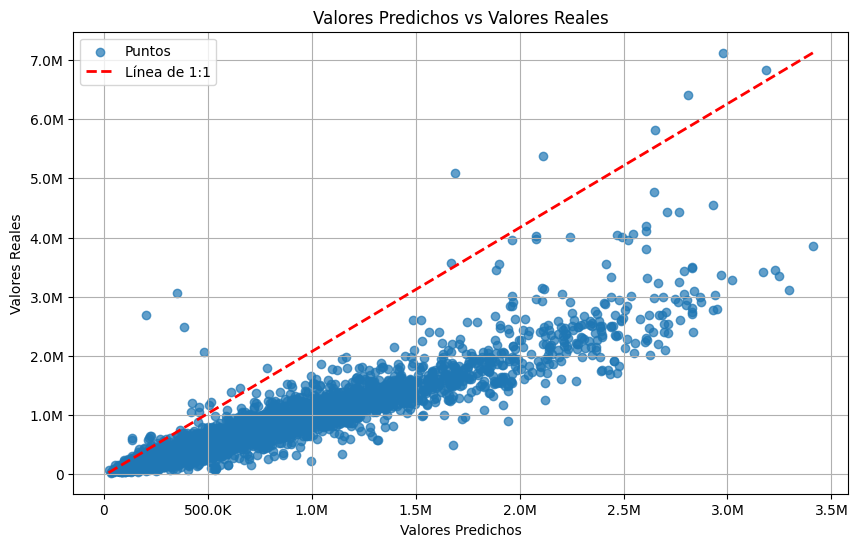

In [ ]:
# Ejemplo de uso
plot_predicciones_vs_reales(df_xgboost_evaluated)

## Residuos

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.ticker as ticker
import seaborn as sns

def plot_residuals_vs_ajustados(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Genera el gráfico de residuales en función de los valores ajustados.

    Parameters:
    - df: DataFrame que contiene los datos.
    - y_true_column: Nombre de la columna con los valores reales.
    - y_pred_column: Nombre de la columna con los valores predichos por el modelo.
    """
    residuals = df[y_true_column] - df[y_pred_column]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[y_pred_column], y=residuals, alpha=0.7, label='Residuos')
    plt.axhline(y=0, color='red', label='Línea base')
    plt.title('Residuos vs. Valores Ajustados')
    plt.xlabel('Valores Ajustados')
    plt.ylabel('Residuos')
    plt.legend()

    # Aplica la función de formato a las etiquetas de los ejes
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_magnitude))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_magnitude))

    plt.show()

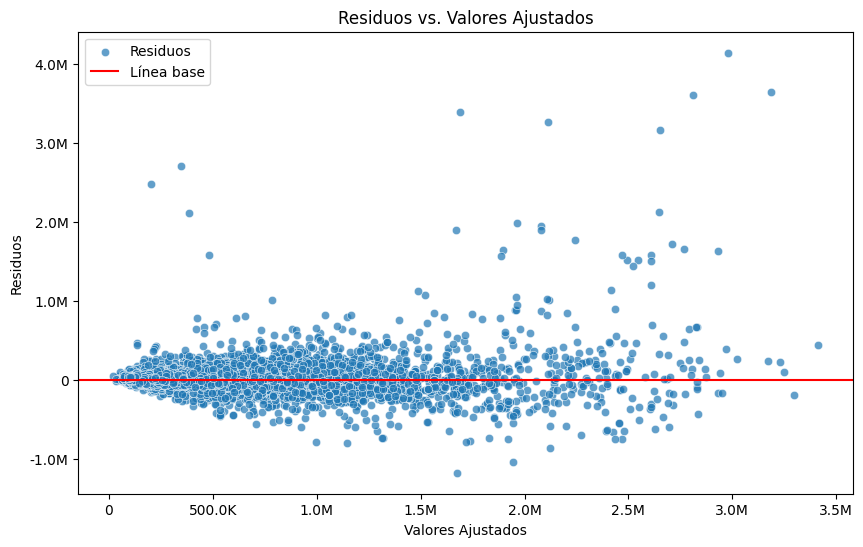

In [ ]:
# Ejemplo de uso:
plot_residuals_vs_ajustados(df_xgboost_evaluated)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_summary(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Parameters:
    - df: DataFrame que contiene los datos.
    - y_true_column: Nombre de la columna con los valores reales.
    - y_pred_column: Nombre de la columna con los valores predichos por el modelo.
    """
    # Calcula los residuos directamente como una Serie de pandas
    residuals = df[y_true_column] - df[y_pred_column]

    # Filtra outliers
    filtered_residuals = residuals[~residuals.index.isin(residuals[residuals > residuals.quantile(0.975)].index)]

    print("\nPrimer DataFrame:")
    # Imprime métricas específicas para el conjunto de datos original
    print(f'Error medio: {df["error"].mean():.6f}, MAE: {df["absolute_error"].mean():.6f}, MPE: {df["percentage_error"].mean():.6f}, MAPE: {df["absolute_percentage_error"].mean():.6f}')

    # Plot con outliers
    plt.figure(figsize=(11, 4))
    sns.boxplot(x=residuals, width=0.5, color='skyblue', boxprops=dict(facecolor='red', alpha=0.3), flierprops=dict(markerfacecolor='red', marker='D'))
    plt.title('Boxplot de Residuos')
    plt.xlabel('Residuos')

    # Línea divisoria
    plt.axhline(0, color='black', linestyle='--', linewidth=2)

    plt.show()

    # Línea divisoria
    print("\n" + "="*113 + "\n")

    print("\nSegundo DataFrame (sin outliers):")
    # Imprime métricas específicas para el conjunto de datos sin outliers
    print(f'Error medio: {filtered_residuals.mean():.6f}, MAE: {abs(filtered_residuals).mean():.6f}, MPE: {filtered_residuals.mean() / df[y_true_column].mean() * 100:.6f}, MAPE: {abs(filtered_residuals / df[y_true_column]).mean() * 100:.6f}')

    # Plot sin outliers
    plt.figure(figsize=(11, 4))
    sns.boxplot(x=filtered_residuals, width=0.5, color='skyblue', boxprops=dict(facecolor='green', alpha=0.3), showfliers=False)
    plt.title('Boxplot (Sin Outliers)')
    plt.xlabel('Residuos')

    plt.show()


Primer DataFrame:
Error medio: 6403.142737, MAE: 56353.041603, MPE: -2.896836, MAPE: 15.539599


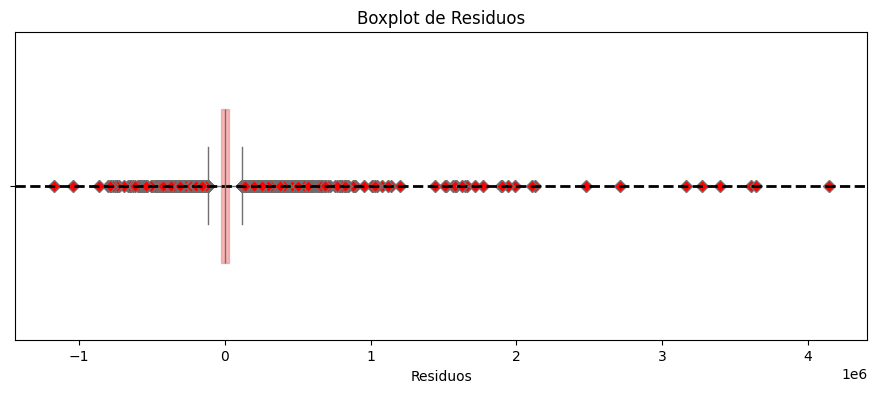




Segundo DataFrame (sin outliers):
Error medio: -5428.788680, MAE: 45803.306252, MPE: -1.384372, MAPE: 15.198831


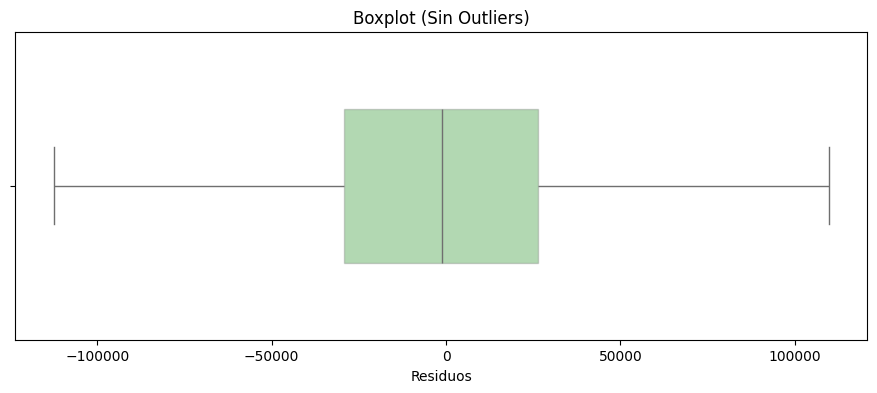

In [ ]:
plot_residuals_summary(df_xgboost_evaluated)

In [ ]:
def plot_qq_plot(df, y_true_column='precio', y_pred_column='predicciones'):
    """
    Genera el gráfico cuantil-cuantil (Normal Q-Q).

    Parameters:
    - df: DataFrame que contiene los datos.
    - y_true_column: Nombre de la columna con los valores reales.
    - y_pred_column: Nombre de la columna con los valores predichos por el modelo.
    """
    residuals = df[y_true_column] - df[y_pred_column]
    filtered_residuals = residuals[~residuals.index.isin(residuals[residuals > residuals.quantile(0.975)].index)]

    # Genera el gráfico Q-Q con Seaborn
    plt.figure(figsize=(11, 8))
    sm.qqplot(residuals, line='s')
    plt.title('Normal Q-Q')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de los residuos')
    plt.grid(True)
    sns.despine()
    plt.show()

    # Genera el gráfico Q-Q con Seaborn
    plt.figure(figsize=(11, 8))
    sm.qqplot(filtered_residuals, line='s')
    plt.title('Filtered Q-Q')
    plt.xlabel('Cuantiles teóricos')
    plt.ylabel('Cuantiles de los residuos')
    plt.grid(True)
    sns.despine()
    plt.show()

<Figure size 1100x800 with 0 Axes>

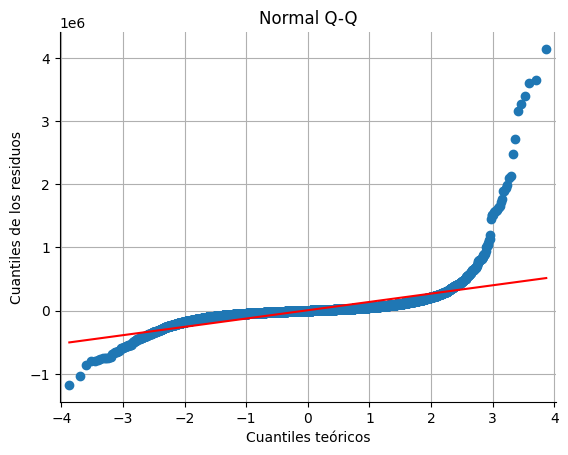

<Figure size 1100x800 with 0 Axes>

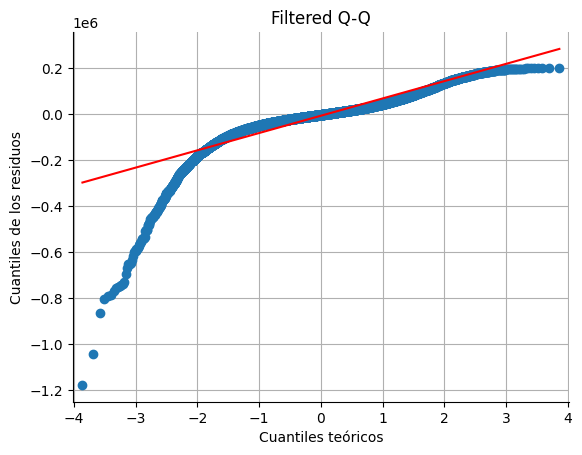

In [ ]:
# Ejemplo de uso
plot_qq_plot(df_xgboost_evaluated)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_residual_histogram(df, y_true_column='precio', y_pred_column='predicciones', bins=50):
    """
    Plotea un histograma de los residuos.

    Parámetros:
    - df_evaluacion: DataFrame con las predicciones y métricas.
    - bins: Número de compartimentos para el histograma.

    Uso:
    >>> plot_residual_histogram(df_evaluacion, bins=50)
    """
    # Calcula los residuos directamente como una Serie de pandas
    residuals = df[y_true_column] - df[y_pred_column]

    filtered_residuals = residuals[~residuals.index.isin(residuals[residuals > residuals.quantile(0.975)].index)]

    # Configurar la disposición de los subgráficos uno al lado del otro
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plotear el histograma de residuos original
    axs[0].hist(residuals, bins=bins, color='blue', edgecolor='black')

    # Aplicar el formato de magnitud a los ejes x e y
    axs[0].xaxis.set_major_formatter(FuncFormatter(format_magnitude))
    axs[0].yaxis.set_major_formatter(FuncFormatter(format_magnitude))

    # Añadir etiquetas y título
    axs[0].set_xlabel('Residuos')
    axs[0].set_ylabel('Frecuencia')
    axs[0].set_title('Histograma de Residuos (Original)')

    # Plotear el histograma de residuos filtrados
    axs[1].hist(filtered_residuals, bins=bins, color='blue', edgecolor='black')

    # Aplicar el formato de magnitud a los ejes x e y
    axs[1].xaxis.set_major_formatter(FuncFormatter(format_magnitude))
    axs[1].yaxis.set_major_formatter(FuncFormatter(format_magnitude))

    # Inclinar las etiquetas del eje x 45 grados
    axs[1].tick_params(axis='x', rotation=45)

    # Añadir etiquetas y título
    axs[1].set_xlabel('Residuos')
    axs[1].set_ylabel('Frecuencia')
    axs[1].set_title('Histograma de Residuos (Filtrado)')

    # Ajustar el diseño
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

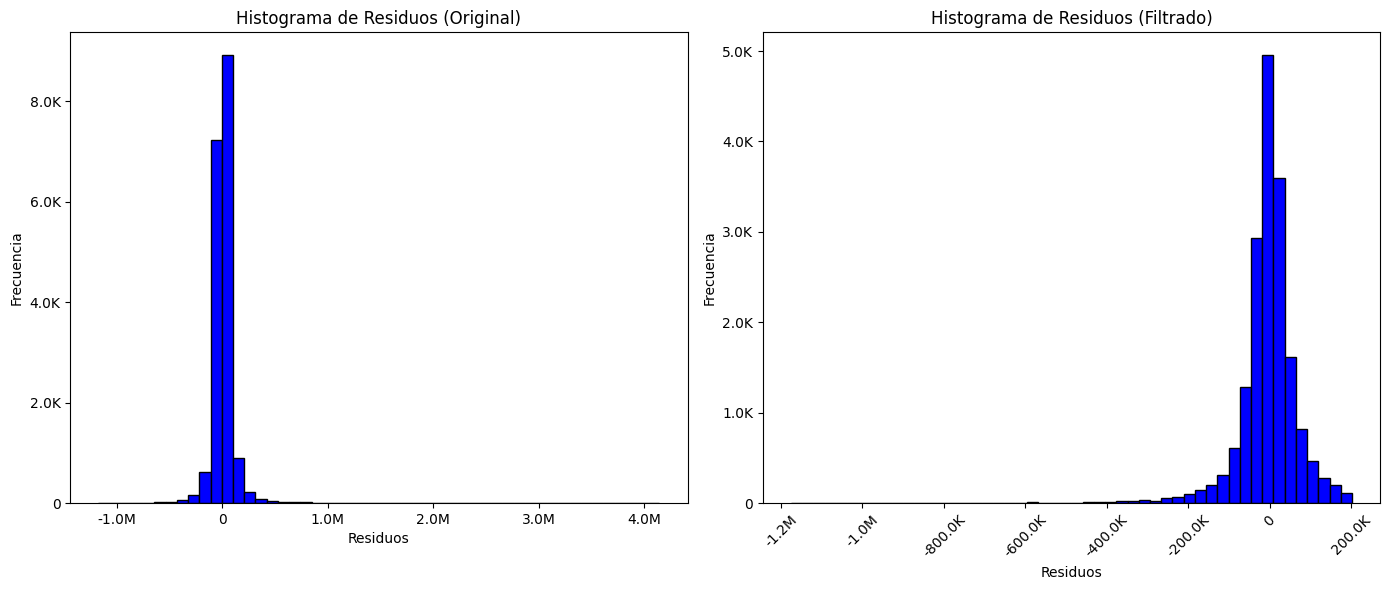

In [ ]:
plot_residual_histogram(df_xgboost_evaluated)

In [ ]:
def plot_residuals(df, columna='precio'):
    residuals = df['error']
    plt.scatter(df[columna], residuals)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Valor Real')
    plt.ylabel('Residuos')
    plt.title('Residuos vs. Valores Reales')

    # Crear una instancia de Axes
    ax = plt.gca()

    # Aplicar el formato de magnitud a los ejes x e y
    ax.xaxis.set_major_formatter(FuncFormatter(format_magnitude))
    ax.yaxis.set_major_formatter(FuncFormatter(format_magnitude))

    plt.show()

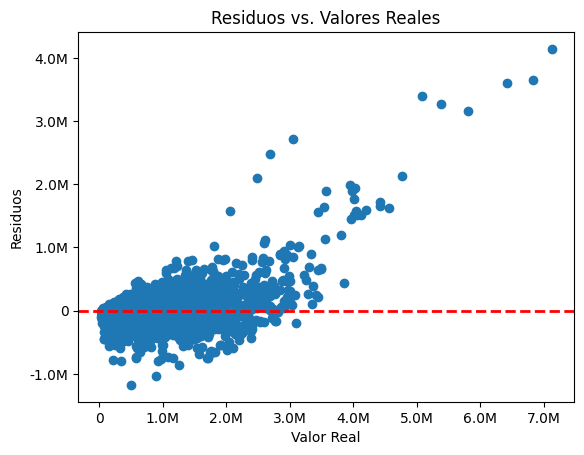

In [ ]:
plot_residuals(df_xgboost_evaluated)

In [ ]:
def obtener_importancia_caracteristicas(modelo, nombres_caracteristicas=None):
    """
    Obtiene la importancia de las características desde un modelo.

    Parámetros:
    - modelo: El modelo entrenado (por ejemplo, un modelo XGBoost).
    - nombres_caracteristicas: Lista de nombres de características (por defecto, usa las columnas de df_test).

    Retorna:
    - DataFrame con la importancia de las características.
    """
    if nombres_caracteristicas is None:
        nombres_caracteristicas = modelo.get_booster().feature_names

    importancia = modelo.feature_importances_

    if len(nombres_caracteristicas) != len(importancia):
        raise ValueError("Las listas de nombres de características y la importancia deben tener la misma longitud.")

    df_importancia = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Importancia': importancia})
    df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
    return df_importancia

In [ ]:
obtener_importancia_caracteristicas(model_xgb)

,Caracteristica,Importancia
0,area_construida,0.171810
47,DISTRITO_Salamanca,0.055851
2,n_banos,0.054504
33,DISTRITO_Arganzuela,0.044980
49,DISTRITO_Tetuán,0.043565
...,...,...
134,BARRIO_Orcasur,0.000000
42,DISTRITO_Latina,0.000000
40,DISTRITO_Fuencarral-El Pardo,0.000000
142,BARRIO_Peñagrande,0.000000


In [ ]:
def obtener_importancia_caracteristicas_grafica(modelo, nombres_caracteristicas=None, top_n=20):
    """
    Obtiene la importancia de las características desde un modelo y devuelve una gráfica horizontal.

    Parámetros:
    - modelo: El modelo entrenado (por ejemplo, un modelo XGBoost).
    - nombres_caracteristicas: Lista de nombres de características (por defecto, usa las columnas de df_test).
    - top_n: Número de características principales a mostrar (por defecto, 20).

    Retorna:
    - Gráfica de barras horizontales con la importancia de las características.
    """
    if nombres_caracteristicas is None:
        nombres_caracteristicas = modelo.get_booster().feature_names

    importancia = modelo.feature_importances_

    if len(nombres_caracteristicas) != len(importancia):
        raise ValueError("Las listas de nombres de características y la importancia deben tener la misma longitud.")

    df_importancia = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Importancia': importancia})
    df_importancia = df_importancia.sort_values(by='Importancia', ascending=True).tail(top_n)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(df_importancia['Caracteristica'], df_importancia['Importancia'], color='skyblue')

    # Configuración de la gráfica
    ax.set_xlabel('Importancia')
    ax.set_ylabel('Caracteristica')
    ax.set_title('Importancia de las Caracteristicas')

    plt.show()

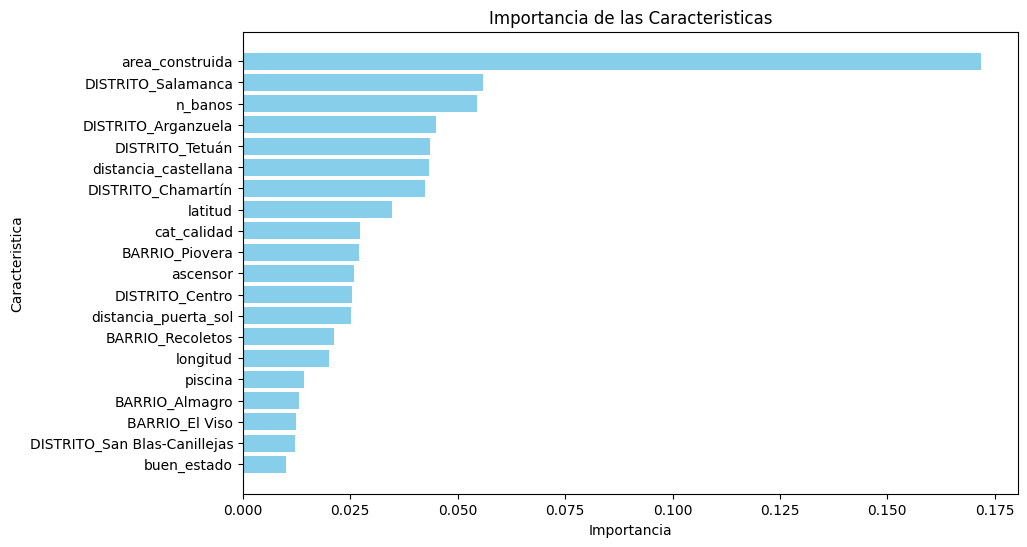

In [ ]:
obtener_importancia_caracteristicas_grafica(model_xgb)

## Select points from distance

In [ ]:
import numpy as np

# Latitud promedio de Madrid
madrid_latitude = 40.4168

# Conversión precisa para la zona de Madrid
degrees_per_km_madrid = 1 / (111.32 * np.cos(np.radians(madrid_latitude)))

In [ ]:
degrees_per_km_madrid

In [ ]:
def select_points_distance(df, target_location, distance_threshold_km):

    """
    La función 'select_points_near_location_euclidean' se utiliza para seleccionar índices de muestras en un DataFrame que están dentro de una distancia euclidiana especificada desde una ubicación objetivo en Madrid.

    Parámetros:
    - df: DataFrame que debe contener las columnas 'latitud', 'longitud' y 'precio'.
    - target_location: Tupla con las coordenadas (latitud, longitud) de la ubicación objetivo en Madrid.
    - distance_threshold_km: Distancia umbral en kilómetros (por defecto, 10 km).

    Funcionamiento:
    1. Se asegura de que el DataFrame tenga las columnas 'latitud', 'longitud' y 'precio' necesarias.
    2. Se establece 'degrees_per_km_madrid' como una constante precalculada que representa cuántos grados de latitud corresponden a un kilómetro en la zona de Madrid.
    3. Calcula la distancia euclidiana desde la ubicación objetivo hasta cada punto en el DataFrame utilizando la fórmula de distancia euclidiana en un espacio bidimensional.
    4. Selecciona los índices de las muestras que están dentro de la distancia especificada, utilizando la constante 'degrees_per_km_madrid' para convertir la distancia umbral de kilómetros a grados.

    El resultado de la función es una serie de pandas que contiene los índices de las muestras que cumplen con los criterios de proximidad definidos por la distancia euclidiana y el umbral especificado.
    """

    # Asegúrate de que df tenga columnas 'latitud', 'longitud' y 'precio'
    required_columns = ['latitud', 'longitud', 'precio']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("El DataFrame debe contener las columnas 'latitud', 'longitud' y 'precio'.")

    degrees_per_km_madrid = 0.011798952599750912

    """
    degrees_per_km_madrid = 1 / (111.32 * np.cos(np.radians(40.4168))) -> Aquí se descompone:

    - 40.4168 = establece la latitud promedio de Madrid, que es el valor utilizado para calcular la conversión precisa de kilómetros a grados en la zona de Madrid.
    - 'np.radians(40.4168)': Convierte la latitud de grados a radianes, ya que las funciones trigonométricas en NumPy trabajan con radianes.
    - 'np.cos(np.radians(40.4168))': Calcula el coseno del valor convertido a radianes, que es crucial para ajustar la distancia en grados según la latitud.
    - '111.32 * np.cos(np.radians(40.4168))': Multiplica el coseno por 111.32, una estimación del número de kilómetros por grado en la latitud promedio de la Tierra.
    - '1 / (111.32 * np.cos(np.radians(40.4168)))': Invierte el resultado para obtener la cantidad de grados de latitud por kilómetro.
    Este valor se utiliza para convertir distancias en kilómetros a distancias en grados en la latitud de Madrid.
    """

    # Calcula la distancia euclidiana desde la ubicación objetivo para cada punto en el DataFrame
    distances = np.sqrt((df['latitud'] - target_location[0])**2 + (df['longitud'] - target_location[1])**2)

    # Selecciona los índices de las muestras que están dentro de la distancia especificada
    selected_indices = distances[distances <= distance_threshold_km * degrees_per_km_madrid].index

    # Imprime la cantidad seleccionada y la proporción con respecto al total del DataFrame
    total_samples = len(df)
    selected_samples = len(selected_indices)
    print(f"Seleccionado {selected_samples} de {total_samples} = {selected_samples / total_samples:.2%}")

    return selected_indices

In [ ]:
selected_indices = select_points_distance(df_train, (40.409554, -3.659439), 1)

Seleccionado 1042 de 54937 = 1.90%


In [ ]:
def select_points_samples(df, target_location, num_samples=10):
    """
    La función 'select_points_near_location_euclidean' se utiliza para seleccionar índices de las muestras más cercanas
    en un DataFrame desde una ubicación objetivo en Madrid.

    Parámetros:
    - df: DataFrame que debe contener las columnas 'latitud', 'longitud' y 'precio'.
    - target_location: Tupla con las coordenadas (latitud, longitud) de la ubicación objetivo en Madrid.
    - num_samples: Número de muestras a seleccionar (por defecto, 10).

    Funcionamiento:
    1. Se asegura de que el DataFrame tenga las columnas 'latitud', 'longitud' y 'precio' necesarias.
    2. Se establece 'degrees_per_km_madrid' como una constante precalculada que representa cuántos grados de latitud corresponden a un kilómetro en la zona de Madrid.
    3. Calcula la distancia euclidiana desde la ubicación objetivo hasta cada punto en el DataFrame utilizando la fórmula de distancia euclidiana en un espacio bidimensional.
    4. Selecciona los índices de las 'num_samples' muestras más cercanas, utilizando la constante 'degrees_per_km_madrid' para convertir la distancia umbral de kilómetros a grados.

    El resultado de la función es una serie de pandas que contiene los índices de las 'num_samples' muestras más cercanas a la ubicación objetivo.
    """
    # Asegúrate de que df tenga columnas 'latitud', 'longitud' y 'precio'
    required_columns = ['latitud', 'longitud', 'precio']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("El DataFrame debe contener las columnas 'latitud', 'longitud' y 'precio'.")

    degrees_per_km_madrid = 0.011798952599750912

    """
    degrees_per_km_madrid = 1 / (111.32 * np.cos(np.radians(40.4168))) -> Aquí se descompone:

    - 40.4168 = establece la latitud promedio de Madrid, que es el valor utilizado para calcular la conversión precisa de kilómetros a grados en la zona de Madrid.
    - 'np.radians(40.4168)': Convierte la latitud de grados a radianes, ya que las funciones trigonométricas en NumPy trabajan con radianes.
    - 'np.cos(np.radians(40.4168))': Calcula el coseno del valor convertido a radianes, que es crucial para ajustar la distancia en grados según la latitud.
    - '111.32 * np.cos(np.radians(40.4168))': Multiplica el coseno por 111.32, una estimación del número de kilómetros por grado en la latitud promedio de la Tierra.
    - '1 / (111.32 * np.cos(np.radians(40.4168)))': Invierte el resultado para obtener la cantidad de grados de latitud por kilómetro.
    Este valor se utiliza para convertir distancias en kilómetros a distancias en grados en la latitud de Madrid.
    """

    # Calcula la distancia euclidiana desde la ubicación objetivo para cada punto en el DataFrame
    distances = np.sqrt((df['latitud'] - target_location[0])**2 + (df['longitud'] - target_location[1])**2)

    # Selecciona los índices de las 'num_samples' muestras más cercanas
    selected_indices = distances.nsmallest(num_samples).index

    # Calcula la distancia máxima observada para las muestras seleccionadas en kilómetros
    max_distance_km = distances[selected_indices].max() / degrees_per_km_madrid

    # Imprime la distancia máxima en kilómetros y la proporción con respecto al total del DataFrame
    total_samples = len(df)
    selected_samples = len(selected_indices)
    print(f"Para {selected_samples} muestras, se ha observado una distancia máxima de {max_distance_km:.2f} km.")

    return selected_indices

In [ ]:
selected_indices2 = select_points_samples(df_train, (40.409554, -3.659439), 1042)

Para 1042 muestras, se ha observado una distancia máxima de 1.00 km.


Seleccionado 1042 de 54937 = 1.90%


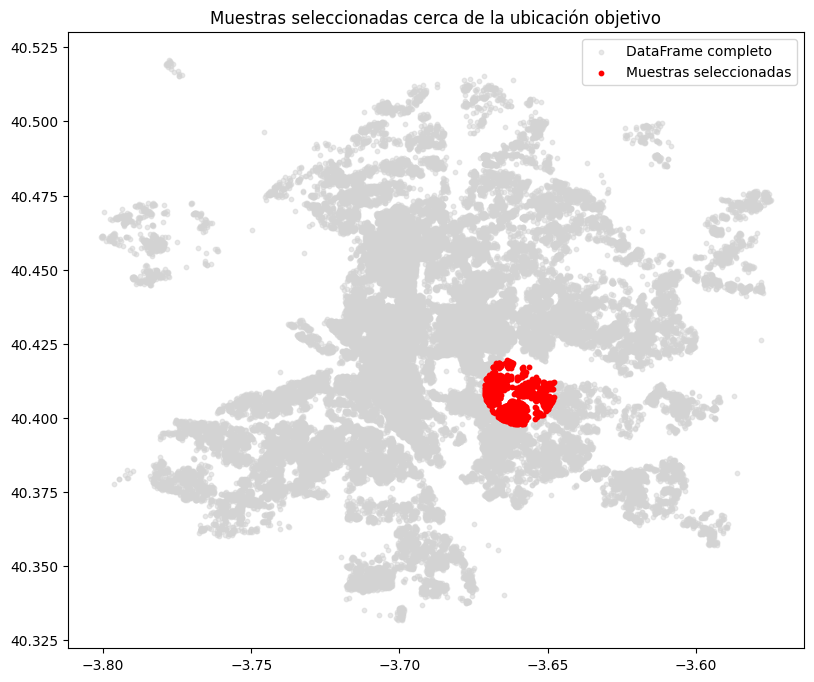

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Crea un GeoDataFrame a partir de tu DataFrame original
geometry = [Point(xy) for xy in zip(df_train['longitud'], df_train['latitud'])]
gdf = gpd.GeoDataFrame(df_train, geometry=geometry)

# Define la ubicación objetivo
target_location = (40.409554, -3.659439)

# Llama a la función select_points_distance para obtener los índices seleccionados
selected_indices = select_points_distance(df_train, target_location, distance_threshold_km=1)

# Crea un GeoDataFrame con las muestras seleccionadas
selected_geometry = [Point(xy) for xy in zip(df_train.loc[selected_indices, 'longitud'], df_train.loc[selected_indices, 'latitud'])]
selected_gdf = gpd.GeoDataFrame(df_train.loc[selected_indices], geometry=selected_geometry)

# Crea un gráfico con el GeoDataFrame completo y las muestras seleccionadas
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='lightgray', markersize=10, alpha=0.5, label='DataFrame completo')
selected_gdf.plot(ax=ax, color='red', markersize=10, label='Muestras seleccionadas')
plt.title('Muestras seleccionadas cerca de la ubicación objetivo')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

def evaluate_model_with_distances(df, distances, target_location=None, target_column='precio', custom_model=None):
    """
    Evalúa el rendimiento de un modelo XGBoost (o un modelo personalizado) para diferentes distancias de selección.

    Parámetros:
    - df: DataFrame que debe contener las columnas 'latitud', 'longitud' y 'precio'.
    - distances: Lista de distancias a probar.
    - target_location: Tupla con las coordenadas (latitud, longitud) de la ubicación objetivo en Madrid (por defecto, None).
    - target_column: Nombre de la columna objetivo (por defecto, 'precio').
    - custom_model: Modelo personalizado (por defecto, None). Si no se proporciona, se utiliza un XGBRegressor base.

    Devuelve:
    - result_dict: Un diccionario que contiene las métricas MAPE y R² para cada distancia.
    """

    result_dict = {}

    # Si no se proporciona una ubicación objetivo, elige un punto aleatorio del DataFrame
    if target_location is None:
        random_index = np.random.choice(df.index)
        target_location = (df.loc[random_index, 'latitud'], df.loc[random_index, 'longitud'])

    for distancia in distances:
        # Selecciona los índices de las muestras que cumplen con la distancia especificada
        selected_indices = select_points_distance(df, target_location=target_location, distance_threshold_km=distancia)

        # Filtra el DataFrame original para obtener solo las muestras seleccionadas
        df_selected = df.loc[selected_indices]

        # Utiliza todas las muestras NO seleccionadas como conjunto de entrenamiento
        df_not_selected = df.drop(index=selected_indices)
        X_train = df_not_selected.drop(columns=[target_column])
        y_train = df_not_selected[target_column]

        # Utiliza todas las muestras seleccionadas como conjunto de prueba
        X_test = df_selected.drop(columns=[target_column])
        y_test = df_selected[target_column]

        # Inicializa y entrena el modelo (personalizado o XGBRegressor base)
        if custom_model is None:
            model = XGBRegressor()
        else:
            model = custom_model

        model.fit(X_train, y_train)

        # Realiza predicciones en el conjunto de prueba
        predictions = model.predict(X_test)

        # Calcula el MAPE
        absolute_percentage_errors = np.abs((y_test - predictions) / y_test)
        mape = np.mean(absolute_percentage_errors) * 100

        # Calcula el R²
        r2 = r2_score(y_test, predictions)

        # Almacena las métricas en el diccionario de resultados
        result_dict[distancia] = {'MAPE': mape, 'R²': r2}

    return result_dict

In [ ]:
# Uso de la función
distances_to_test = [0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 3, 4, 5]
results = evaluate_model_with_distances(df_train, distances_to_test, (40.409554, -3.659439))

Seleccionado 7 de 54937 = 0.01%
Seleccionado 24 de 54937 = 0.04%
Seleccionado 49 de 54937 = 0.09%
Seleccionado 180 de 54937 = 0.33%
Seleccionado 403 de 54937 = 0.73%
Seleccionado 1042 de 54937 = 1.90%
Seleccionado 6617 de 54937 = 12.04%
Seleccionado 14455 de 54937 = 26.31%
Seleccionado 24693 de 54937 = 44.95%
Seleccionado 35188 de 54937 = 64.05%


In [ ]:
results

{0.1: {'MAPE': 10.549015725803915, 'R²': 0.9108436262598135},
 0.2: {'MAPE': 13.500979340402209, 'R²': 0.9291618008234475},
 0.3: {'MAPE': 14.941841096618699, 'R²': 0.9178963444501917},
 0.5: {'MAPE': 20.195085188478366, 'R²': 0.8626841611219586},
 0.7: {'MAPE': 20.98632613772098, 'R²': 0.8241699987781835},
 1: {'MAPE': 19.76691300028197, 'R²': 0.8598201566903849},
 2: {'MAPE': 18.311148836806062, 'R²': 0.8783055941670114},
 3: {'MAPE': 22.544287935149434, 'R²': 0.8918288163966523},
 4: {'MAPE': 25.098441118226887, 'R²': 0.8140815849806856},
 5: {'MAPE': 23.716594625167346, 'R²': 0.7567346285662998}}

### Clustering

#### K-means

En el siguiente análisis, utilizamos el algoritmo de k-means para agrupar las observaciones en nuestro conjunto de datos en un número específico de clusters. Es importante tener en cuenta que, debido a la naturaleza del algoritmo, no garantiza automáticamente que cada cluster tendrá la misma cantidad de observaciones u ocupará la misma cantidad de metros cuadrados

El k-means busca minimizar la varianza intra-cluster y maximizar la varianza inter-cluster, lo que puede llevar a tamaños de cluster desiguales, especialmente si los datos tienen distribuciones no uniformes.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def clusterizar(df, num_clusters):
    # Hacer una copia del DataFrame para evitar modificar el original
    df_copy = df.copy()

    # Selecciona las columnas 'latitud' y 'longitud' del DataFrame
    datos = df_copy[['latitud', 'longitud']]

    # Utiliza k-means para agrupar las observaciones en el número deseado de clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    df_copy['Kmeans'] = kmeans.fit_predict(datos)

    return df_copy


In [ ]:
df_clusters = clusterizar(df_train,20)
df_clusters['Kmeans'].value_counts()

1     6890
8     6148
14    5787
15    4423
2     3827
17    3644
3     2963
0     2801
12    2504
16    2289
10    2216
5     1911
9     1909
13    1450
4     1415
6     1277
7     1243
18     960
19     764
11     516
Name: Kmeans, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(df, cluster_column):
    # Generar una paleta de colores aleatorios basada en el número de clusters
    colores = sns.color_palette('husl', n_colors=len(df[cluster_column].unique()))

    # Ordenar los clusters de forma ascendente
    clusters_ordenados = sorted(df[cluster_column].unique())

    plt.figure(figsize=(10, 8))

    for i, cluster in enumerate(clusters_ordenados):
        cluster_data = df[df[cluster_column] == cluster]
        plt.scatter(cluster_data['longitud'], cluster_data['latitud'], c=[colores[i]], label=f'Cluster {cluster}')

    plt.title('Clusters de Observaciones')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

    # Mover la leyenda fuera del área de trazado
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

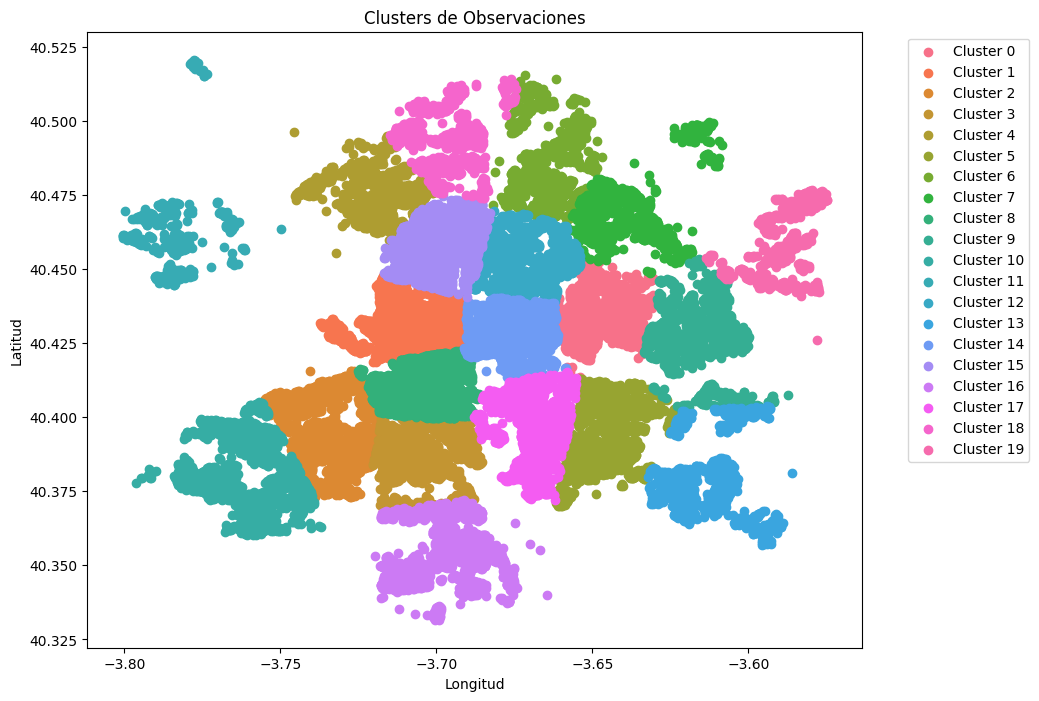

In [ ]:
plot_clusters(df_clusters, 'Kmeans')

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def apply_dbscan(df, eps=0.5, min_samples=5):
    # Hacer una copia del DataFrame para no modificar el original
    df_copy = df.copy()

    # Preprocesar datos - estandarizar las columnas 'latitud' y 'longitud'
    scaler = StandardScaler()
    df_copy[['latitud', 'longitud']] = scaler.fit_transform(df_copy[['latitud', 'longitud']])

    # Crear y ajustar el modelo DBSCAN
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    df_copy['DBSCAN'] = dbscan_model.fit_predict(df_copy[['latitud', 'longitud']])

    return df_copy

In [ ]:
df_clusters = apply_dbscan(df_train, 0.2, 500)

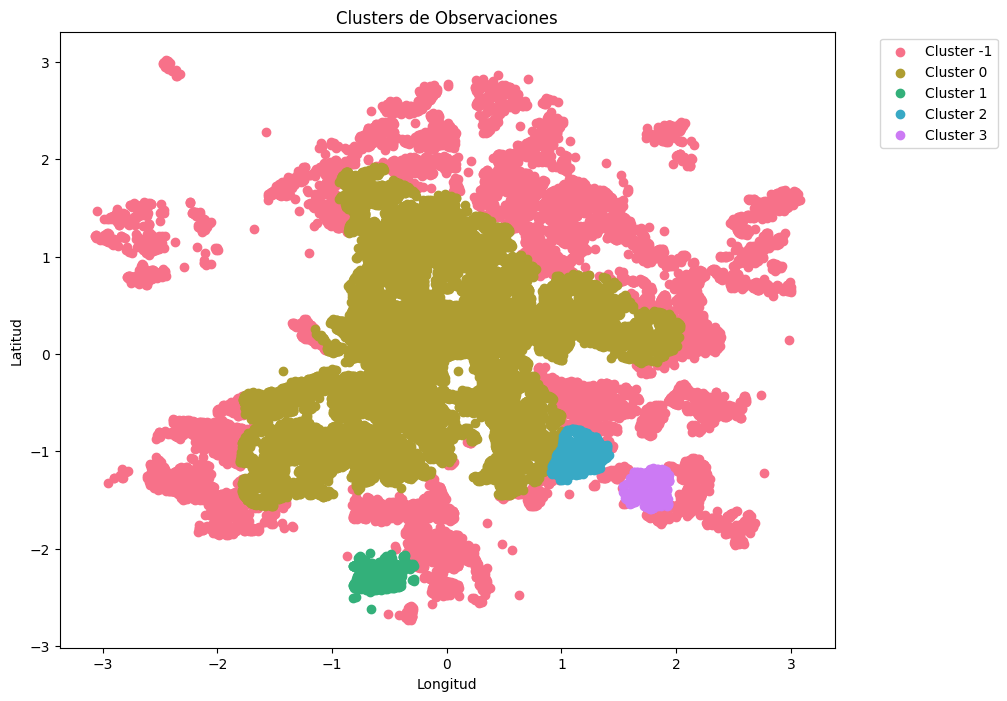

In [ ]:
plot_clusters(df_clusters, 'DBSCAN')

#### Agrupamiento jerárquico